In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [93]:
# Define Merck text.
text = 'Merck (NYSE: MRK), known as MSD outside of the United States and Canada, today announced the completion of the acquisition of Harpoon Therapeutics, Inc. (Nasdaq: HARP). Harpoon is now a wholly-owned subsidiary of Merck, and Harpoon’s common stock will no longer be publicly traded or listed on the Nasdaq Stock Market. Harpoon’s lead candidate, MK-6070 (formerly known as HPN328), is a T-cell engager targeting delta-like ligand 3 (DLL3), an inhibitory canonical Notch ligand that is expressed at high levels in small cell lung cancer (SCLC) and neuroendocrine tumors. The safety, tolerability and pharmacokinetics of MK-6070 is currently being evaluated as monotherapy in a Phase 1/2 clinical trial (NCT04471727) in certain patients with advanced cancers associated with expression of DLL3. The study is also evaluating MK-6070 in combination with atezolizumab in certain patients with SCLC. In March 2022, the U.S. Food and Drug Administration (FDA) granted Orphan Drug Designation to MK-6070 for the treatment of SCLC.'
print(text)

Merck (NYSE: MRK), known as MSD outside of the United States and Canada, today announced the completion of the acquisition of Harpoon Therapeutics, Inc. (Nasdaq: HARP). Harpoon is now a wholly-owned subsidiary of Merck, and Harpoon’s common stock will no longer be publicly traded or listed on the Nasdaq Stock Market. Harpoon’s lead candidate, MK-6070 (formerly known as HPN328), is a T-cell engager targeting delta-like ligand 3 (DLL3), an inhibitory canonical Notch ligand that is expressed at high levels in small cell lung cancer (SCLC) and neuroendocrine tumors. The safety, tolerability and pharmacokinetics of MK-6070 is currently being evaluated as monotherapy in a Phase 1/2 clinical trial (NCT04471727) in certain patients with advanced cancers associated with expression of DLL3. The study is also evaluating MK-6070 in combination with atezolizumab in certain patients with SCLC. In March 2022, the U.S. Food and Drug Administration (FDA) granted Orphan Drug Designation to MK-6070 for t

In [94]:
# import company news feed
news_df = pd.read_parquet('./data/train.parquet')

In [95]:
merc_news_df = news_df[news_df['article_headline'].str.contains('Merck')]
merc_news_df.shape
# news_df.columns

(528, 7)

In [96]:
merc_df = news_df[news_df['ticker']== 'MRK']
merc_df.shape

(492, 7)

In [97]:
merc_df.isna().sum()

ticker              0
name                0
type                0
sector              0
article_date        0
article_headline    0
label               0
dtype: int64

In [98]:
merc_df.columns

Index(['ticker', 'name', 'type', 'sector', 'article_date', 'article_headline',
       'label'],
      dtype='object')

In [99]:
merc_df.drop(columns=['ticker', 'name', 'type', 'sector'], inplace=True)

In [100]:
cols = {'article_date': 'date', 'article_headline': 'headline', 'label': 'sentiment'}
merc_df.rename(columns=cols, inplace=True)
merc_df.columns

Index(['date', 'headline', 'sentiment'], dtype='object')

In [101]:
merc_df['date'] = pd.to_datetime(merc_df['date'])

In [102]:
merc_df.set_index('date', inplace=True)
merc_df.sort_index(inplace=True)
merc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 2009-08-17 12:14:00+00:00 to 2020-06-11 14:22:00+00:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   492 non-null    object
 1   sentiment  492 non-null    object
dtypes: object(2)
memory usage: 11.5+ KB


In [103]:
merc_df.tail(20)

,headline,sentiment
date,,
2020-03-24 12:42:00+00:00,"Argus Research Maintains Buy on Merck & Co, Lo...",mildly bullish
2020-03-30 14:17:00+00:00,Shares of several healthcare companies are tra...,mildly bullish
2020-04-13 10:57:00+00:00,AstraZeneca and Merck Announce Approval of KOS...,mildly bullish
2020-04-16 10:08:00+00:00,Next 45 Days Will Be 'Most Critical Period' Fo...,neutral
2020-04-23 15:27:00+00:00,Shares of several healthcare companies are tra...,mildly bullish
2020-04-27 10:50:00+00:00,Merck and Institute for Systems Biology Collab...,mildly bullish
2020-04-28 12:40:00+00:00,Merck shares are trading lower after the compa...,mildly bearish
2020-04-28 18:48:00+00:00,A CURE For The Common Earnings Play,neutral
2020-04-29 15:04:00+00:00,"Merck Analysts Focus On Fundamentals, Keytruda...",mildly bullish


In [104]:
merc_df.to_csv('./data/merc_news.csv')

In [105]:
merc_df['headlength'] = merc_df['headline'].apply(len)

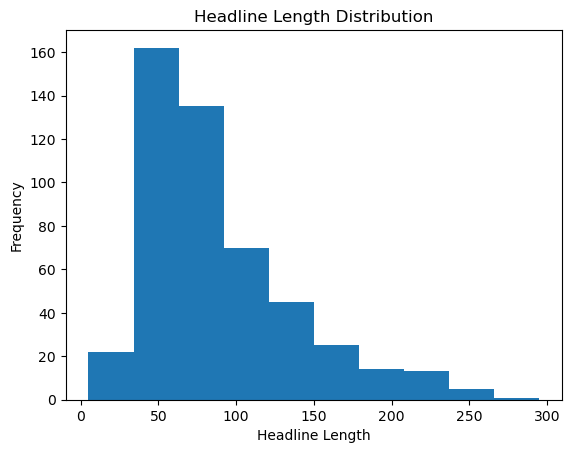

In [106]:
merc_df['headlength'].plot.hist(bins=10)
plt.title('Headline Length Distribution')
plt.xlabel('Headline Length')
plt.savefig('./images/headline_length.png')

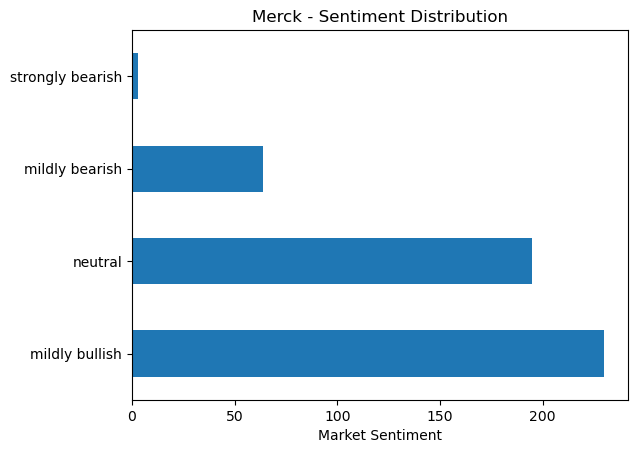

In [107]:
merc_df['sentiment'].value_counts().plot(kind='barh')
plt.title('Merck - Sentiment Distribution')
plt.xlabel('Market Sentiment')
plt.savefig('./images/sentiment_distribution.png')